In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# Need to do some calculation for Y, S,T (use ratios for prime)
# purple group they in text --> not as useful --> not all of them are ID like features some of them might be useful 
    # 1 tend to be very useful 

In [3]:
# CHECK HIGH AND LOW !!! --> INVALID VALUES
# TRULY MISSING VALUES??? CHECK
# are HIGH LOW CONNECTED TO NULL VALUES 
# WHAT DOES - mean --> when does it happen 

# high and low of the IPO
# Pmid fair estimation of P(H) or P(L) --> UNDERPRICING DETECTING (Y1, Y2)

In [2]:
data = pd.read_excel('Competition1_raw_data.xlsx')
                    #dtype={'P(IPO)': float, 'P(1Day)': float})
# define dashes as missing --> 0 or NaN
data.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null object
P(H)       682 non-null object
P(L)       682 non-null object
P(1Day)    682 non-null object
C1         682 non-null object
C2         682 non-null object
C3         682 non-null object
C4         682 non-null object
C5         682 non-null object
C6         682 non-null object
C7         682 non-null object
T1         682 non-null object
T2         682 non-null object
T3         682 non-null object
T4         682 non-null object
T5         682 non-null object
S1         682 non-null object
S2         682 non-null object
S3         682 non-null object
dtypes: object(22)
memory usage: 117.3+ KB


# PLAN
- In every stage make e.g. 5 different ways of doing that --> store that in a seperate notebook
- Connect pipelines in different ways (most probable)
- In the end have multiple notebooks/files to be tested 

# Data Cleaning
1. Finding Null/wrong values
    - '-' --> some 
    - dtype --> All 
    - -1 --> T5, S1
    - 0 (P(1Day)), T2, T3, T4
    - I3 industry type
    - P(H) < P(L)
    - C2 (how to fill that)
2. Make assumptions to why this happen and how to resolve/imputate it
    -   

In [10]:
# Companies that have dashes in some places 
data[(data['P(1Day)']=='-') & (data['P(IPO)']=='-') & (data['P(H)']=='-')& (data['C1']=='-')& (data['C2']=='-')& 
     (data['C3']=='-')& (data['C4']=='-')& (data['C5']=='-')& (data['C6']=='-')& (data['C7']=='-')& (data['I3']=='-')]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,...,-,-,290,8454,7137,192,384,45,68,139
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,...,-,-,494,12004,10226,277,560,46,100,91


In [40]:
data['I3'].value_counts().head(16)

2834    76
7372    49
3674    36
7389    32
3841    30
1311    18
3845    14
7373    12
5812    11
4412    10
7371    10
7374     9
4899     9
8731     9
2836     9
-        8
Name: I3, dtype: int64

In [9]:
# I3 --> C7 
data.loc[data['P(IPO)'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,...,-,-,290,8454,7137,192,384,45,68,139
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,...,-,-,494,12004,10226,277,560,46,100,91


In [10]:
data.loc[data['P(H)'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,...,9602340,-,521,12812,11190,285,545,72,60,121
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,...,7000000,-,631,19479,17409,451,976,71,252,155
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,...,-,-,290,8454,7137,192,384,45,68,139
490,RCH,"CHINA CGAME, INC.",-,3.5,-,-,-,-,-,-,...,737000,-,322,9820,8893,230,410,61,92,91
560,STRL,STERLING CONSTRUCTION CO INC,1600,15,-,-,-,-,-,-,...,2021758,-,310,7195,6393,172,325,44,65,85
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,...,-,-,494,12004,10226,277,560,46,100,91
614,TZOO,TRAVELZOO INC,-,3.5,-,-,-,-,-,-,...,-,-,146,3600,3189,88,181,5,26,38


In [11]:
data.loc[data['I3'] == '-'] 

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,...,7000000,-,631,19479,17409,451,976,71,252,155
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123
400,NAUH,"National American University Holdings, Inc.",-,-,-,-,-,-,-,-,...,-,-,290,8454,7137,192,384,45,68,139
490,RCH,"CHINA CGAME, INC.",-,3.5,-,-,-,-,-,-,...,737000,-,322,9820,8893,230,410,61,92,91
597,TRMM,"Access to Money, Inc.",-,-,-,-,-,-,-,-,...,-,-,494,12004,10226,277,560,46,100,91
614,TZOO,TRAVELZOO INC,-,3.5,-,-,-,-,-,-,...,-,-,146,3600,3189,88,181,5,26,38


In [43]:
# -1 values in data frame
data[data['T5']==-1]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122


In [44]:
# -1 values in data frame
data[data['S1']==-1]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12,12,10,17.98,133,1,0.14,...,18000000,32.179,419,10764,9856,259,643,-1,97,134


In [48]:
# 0 values 
data[data['P(H)']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
332,KIPS,"Kips Bay Medical, Inc.",3841,8,0,8,7.93,309,0,-0.7,...,2062500,0.223,341,9314,8647,218,519,55,119,102


In [50]:
# 0 values 
data[data['T2']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15,18,16,14.84,100,1,2,...,30600000,1239.71,656,0,18173,486,1135,77,229,219
199,EDG,Edgen Group Inc.,5150,11,16,14,9.5,120,1,-0.59,...,15000000,911.612,619,0,19153,474,1108,104,224,253


In [51]:
# 0 values 
data[data['T3']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
27,AMIS,AMIS HOLDINGS INC,3674,20,20,18,20.1,40,1,-0.41,...,30000000,345.322,527,15006,0,334,809,46,181,167
256,GMAN,"Gordmans Stores, Inc.",5600,11,15,13,11.03,97,1,0.13,...,5357143,438.135,385,12828,0,286,591,79,89,181
484,QNST,"QUINSTREET, INC",7389,15,19,17,15,84,1,0.38,...,10000000,260.527,539,16189,0,387,742,59,160,170


In [52]:
# 0 values 
data[data['T4']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
250,GGS,Global Geophysical Services Inc,1382,12,17,15,12,188,1,0.05,...,7500000,312.796,473,12699,11422,0,693,84,112,123
478,PSPT,"PeopleSupport, Inc.",7389,7,12,10,6.5,144,0,0.67,...,6818182,30.013,483,12658,11451,0,800,67,161,152


In [56]:
# 0 values 
data[data['C2']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
32,ANGO,ANGIODYNAMICS INC,3841,11,14,12,12.5,83,0,0.13,...,1950000,38.434,329,7154,6296,175,384,47,47,94
57,AVRX,AVALON PHARMACEUTICALS INC,2834,10.5,12,10,9.49,149,0,-1.63,...,2750000,1.9,270,6360,5780,146,356,63,38,72
72,BDAY,"CELEBRATE EXPRESS, INC",5961,15.5,15,13,16.7,96,0,-0.34,...,3200000,37.811,298,7231,6423,196,270,30,48,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,WSSI,"VISUAL SCIENCES, INC.",7372,8.5,9,8,9.04,124,0,-0.86,...,5000000,16.36,263,6650,6002,165,390,32,66,75
667,XCYT,"Cyclacel Pharmaceuticals, Inc",2834,8,15,13,511.7,158,0,-12.4,...,4200000,0.17,210,5099,4561,125,322,18,44,67
672,XTXI,"ENLINK MIDSTREAM, INC.",1311,19.5,18.5,16.5,8.46667,75,0,-,...,2306000,-,554,13739,12268,325,843,65,139,174
674,ZBB,"EnSync, Inc.",4911,6,6.5,5.5,29,234,0,-0.6,...,3333333,540.399,335,9278,8067,223,394,38,60,59


In [57]:
# 0 values 
data[data['C3']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
36,APKT,ACME PACKET INC,3576,9.5,7.5,6.5,15.91,133,1,0,...,11474528,36.12,547,14728,13418,345,841,60,149,176
346,LMAT,LEMAITRE VASCULAR INC,3841,7,10,8,6.2,177,1,0,...,5500000,30.727,500,11490,10438,277,556,61,151,149
383,MM,Millennial Media Inc.,7311,13,11,9,25,84,1,0,...,10200000,103.678,560,16053,14755,395,818,70,108,145
628,VITC,"Vitacost.com, Inc.",7389,12,13,11,12.05,827,0,0,...,11000000,143.602,380,9286,8021,226,458,54,45,118
645,VSE,VERASUN ENERGY CORP,2860,23,22,21,30,76,1,0,...,18250000,236.359,397,10947,9388,244,398,26,74,92


In [67]:
# 0 values 
data[data['P(1Day)']==0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147
266,GSAT,"Globalstar, Inc.",4899,17,18,16,0,108,1,0.23,...,7500000,127.147,759,18196,16262,397,959,85,228,173
279,HERO,"HERCULES OFFSHORE, INC.",1381,20,20,18,0,111,1,-,...,9200000,-,494,12518,11207,297,603,49,103,135
364,MATH,SAJAN INC,3674,6,8,6,0,85,0,-0.95,...,4000000,130,235,5674,5085,132,284,27,66,63


In [72]:
# P(H) < P(L)
data[data['P(H)'] < data['P(L)']]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
332,KIPS,"Kips Bay Medical, Inc.",3841,8,0,8,7.93,309,0,-0.7,...,2062500,0.223,341,9314,8647,218,519,55,119,102
416,NPTT,NPTEST HOLDING CORP,3825,12,3,11,11.49,92,1,-,...,14600000,243.491,411,11737,10440,275,784,66,133,289


# Imputation
### Decide on the order + different pipelines 
- replace dashes (-), 0, -1, P(H) < P(L) with NaN
- number and % of missing data<br>
    - percent_missing = df.isnull().sum() * 100 / len(df)<br>
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
- make them a seperate columns 

- correct dtype<br>
- column calculation 
    - the problem probably was because we made calculations for new columns before imputing (so first impute then calculate new columns)

Methods:
1. bbfill 
2. ffill
3. median
4. mean
5. mode
6. Treating missing as seperate value (new column/binary value)
7. Infer Baysen/classification tree's
    - http://nadbordrozd.github.io/blog/2017/03/05/missing-data-imputation-with-bayesian-networks/
    - https://pypi.org/project/predictive_imputer/
    - https://www.analyticsvidhya.com/blog/2016/03/tutorial-powerful-packages-imputing-missing-values/
    - https://xgboost.readthedocs.io/en/latest/
    - 
8. Binning??

# Descriptive 
1. https://www.dataquest.io/blog/basic-statistics-with-python-descriptive-statistics/
- .describe()
- scipy.stats.describe(y, ddof=1, bias=False)
- https://realpython.com/python-statistics/


Some questions we could also answer: (NOT REQUIRED)
- how did companies do/were rated based on their EPS?
- does it have any effect on a company depending on the number of days its in the IPO process 
- does higher IPO price offer better performance/outlook
- in what condition the company is (EPS, earnings...) based on how many shares they sell
- does underwriter rating have any effect and is it correlated with positive/neg words, word lenght etc.
- Lower price more shares? higher earnings less shares?

# CORRELATION and simple plots 
- https://realpython.com/python-statistics/ (Towards the bottom)
- also in lectures that professors posted

# Normality Test 
- https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

- Histogram
- Quantile-Quantile Plot
- Statistical Normality Tests
- Shapiro-Wilk Test

# Normalization

# Standardization

# Discretization 

# Conversion

# Outliers 

# Data Reduction

# Extra

In [8]:
# first count how many 0's
data = data.astype(str)
data['P(1Day)'] = data['P(1Day)'].str.strip()
data['P(1Day)'] = data['P(1Day)'].replace('-', 0)
data['P(1Day)'] = data['P(1Day)'].astype(float)

In [9]:
data = data.astype(str)
data = data.replace('-',0)
data[['P(IPO)','P(H)','P(L)','P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']] = data[['P(IPO)','P(H)','P(L)','P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']].astype(float)

In [10]:
data['C2'] = data['C2'].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null float64
P(H)       682 non-null float64
P(L)       682 non-null float64
P(1Day)    682 non-null float64
C1         682 non-null float64
C2         682 non-null int64
C3         682 non-null float64
C4         682 non-null float64
C5         682 non-null float64
C6         682 non-null float64
C7         682 non-null float64
T1         682 non-null float64
T2         682 non-null float64
T3         682 non-null float64
T4         682 non-null float64
T5         682 non-null float64
S1         682 non-null float64
S2         682 non-null float64
S3         682 non-null float64
dtypes: float64(18), int64(1), object(3)
memory usage: 117.3+ KB


In [12]:
# 
data['T2'].value_counts()

0.0        3
10562.0    2
10731.0    2
13810.0    2
6939.0     2
          ..
4882.0     1
9959.0     1
7166.0     1
26820.0    1
21792.0    1
Name: T2, Length: 671, dtype: int64

In [27]:
# similarities between different null values 
sim = data[data['P(1Day)']==0]

P(mid) = (P(H)+P(L))/2

In [14]:
# P(mid) calculation and add it to the column 
data['P(mid)'] = (data['P(H)'] - data['P(L)'])/2

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 23 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null float64
P(H)       682 non-null float64
P(L)       682 non-null float64
P(1Day)    682 non-null float64
C1         682 non-null float64
C2         682 non-null int64
C3         682 non-null float64
C4         682 non-null float64
C5         682 non-null float64
C6         682 non-null float64
C7         682 non-null float64
T1         682 non-null float64
T2         682 non-null float64
T3         682 non-null float64
T4         682 non-null float64
T5         682 non-null float64
S1         682 non-null float64
S2         682 non-null float64
S3         682 non-null float64
P(mid)     682 non-null float64
dtypes: float64(19), int64(1), object(3)
memory usage: 122.7+ KB


# this will be different after imputation

In [16]:
# targets to be calculated
# make it equal to P(IPO) then we will just replace
data['Y1'] = data['P(IPO)']
data['Y2'] = data['P(IPO)']

# replace Y1 and change dtype to binary
data.loc[(data['Y1'] < data['P(mid)']),'Y1'] = 1
data.loc[(data['Y1'] > data['P(mid)']),'Y1'] = 0
data['Y1'] = data['Y1'].astype(int)

# replace Y2
data.loc[(data['Y2'] < data['P(1Day)']),'Y2'] = 1
data.loc[(data['Y2'] > data['P(1Day)']),'Y2'] = 0
data['Y2'] = data['Y2'].astype(int)

# Control values to be calculated
data['C3`'] = data['C3']
data['C3`'] = np.where((data['C3'] > 0),1,data['C3`'])
data['C3`'] = np.where((data['C3'] < 0),0,data['C3`'])
data['C3`'] = data['C3`'].astype(int)

data['C5`'] = data['C5']/data['C6']


# % SIGN??
data['C6calc'] = ((data['P(IPO)'] - data['P(mid)']) / data['P(mid)']) * 1
data['C6`'] = 0
data['C6`'] = np.where((data['P(IPO)'] > data['P(mid)']),data['C6calc'],data['C6`'])
data['C6`'] = np.where((data['P(IPO)'] < data['P(mid)']),0,data['C6`'])

data.head(20)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1,S2,S3,P(mid),Y1,Y2,C3`,C5`,C6calc,C6`
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1,3.43,...,62.0,117.0,139.0,0.5,0,1,1,3.864345,19.0,19.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0,-1.62,...,71.0,242.0,237.0,1.0,0,0,0,12.028832,7.0,7.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1,-1.24,...,61.0,33.0,60.0,1.0,0,0,0,3.369134,6.0,6.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1,-0.91,...,80.0,59.0,110.0,1.0,0,1,0,3.299697,10.5,10.5
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1,0.07,...,67.0,149.0,167.0,1.0,0,1,1,3.726269,20.0,20.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1,0.06,...,62.0,96.0,181.0,1.0,0,1,1,5.724394,12.5,12.5
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1,-1.87,...,82.0,106.0,135.0,1.0,0,1,0,3.463095,5.0,5.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0,-0.74,...,55.0,120.0,122.0,1.0,0,0,0,2.421469,4.0,4.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1,-0.51,...,58.0,124.0,234.0,1.0,0,1,0,4.816591,14.0,14.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1,1.49,...,81.0,90.0,147.0,1.0,0,0,1,3.056608,8.0,8.0


In [28]:
sim_missing_val = data[(data['P(1Day)']==0) & (data['P(IPO)']==0) & (data['P(H)']==0)].count()

In [18]:
# number of zeros in each column 
(data == 0).astype(int).sum(axis=0)

I1           0
I2           0
I3           8
P(IPO)       5
P(H)        11
P(L)        10
P(1Day)     26
C1          22
C2         115
C3          41
C4          22
C5           6
C6           6
C7          72
T1           1
T2           3
T3           4
T4           3
T5           1
S1           1
S2           1
S3           1
P(mid)      11
Y1         682
Y2         185
C3`        357
C5`          0
C6calc       0
C6`          5
dtype: int64

In [19]:
# Number of non-zero values 
data.astype(bool).sum(axis=0)

I1         682
I2         682
I3         674
P(IPO)     677
P(H)       671
P(L)       672
P(1Day)    656
C1         660
C2         567
C3         641
C4         660
C5         676
C6         676
C7         610
T1         681
T2         679
T3         678
T4         679
T5         681
S1         681
S2         681
S3         681
P(mid)     671
Y1           0
Y2         497
C3`        325
C5`        682
C6calc     682
C6`        677
dtype: int64

In [20]:
data.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1,S2,S3,P(mid),Y1,Y2,C3`,C5`,C6calc,C6`
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1,3.43,...,62.0,117.0,139.0,0.5,0,1,1,3.864345,19.0,19.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0,-1.62,...,71.0,242.0,237.0,1.0,0,0,0,12.028832,7.0,7.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1,-1.24,...,61.0,33.0,60.0,1.0,0,0,0,3.369134,6.0,6.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1,-0.91,...,80.0,59.0,110.0,1.0,0,1,0,3.299697,10.5,10.5
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1,0.07,...,67.0,149.0,167.0,1.0,0,1,1,3.726269,20.0,20.0


In [38]:
# replace with nulls
# maybe we can run it with zeros/np.nan
cols = ["P(IPO)","P(H)","P(L)","P(1Day)","C1",'C2','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
data[cols] = data[cols].replace({0:np.nan})

# Imputate with median
# check if it works right 
data[cols]=data[cols].fillna(data[cols].median())
#.iloc[0]
data['C5'] = data['C5'].fillna(data['C5'].median())

# display
data.head(12)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1,S2,S3,P(mid),Y1,Y2,C3`,C5`,C6calc,C6`
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,62.0,117.0,139.0,0.5,0,1,1,3.864345,19.0,19.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,13.5,-1.62,...,71.0,242.0,237.0,1.0,0,0,0,12.028832,7.0,7.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,61.0,33.0,60.0,1.0,0,0,0,3.369134,6.0,6.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,80.0,59.0,110.0,1.0,0,1,0,3.299697,10.5,10.5
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,67.0,149.0,167.0,1.0,0,1,1,3.726269,20.0,20.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,62.0,96.0,181.0,1.0,0,1,1,5.724394,12.5,12.5
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,82.0,106.0,135.0,1.0,0,1,0,3.463095,5.0,5.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,13.5,-0.74,...,55.0,120.0,122.0,1.0,0,0,0,2.421469,4.0,4.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,58.0,124.0,234.0,1.0,0,1,0,4.816591,14.0,14.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,13.500000,106.0,1.0,1.49,...,81.0,90.0,147.0,1.0,0,0,1,3.056608,8.0,8.0


In [39]:
data.isnull().sum()

I1         0
I2         0
I3         0
P(IPO)     0
P(H)       0
P(L)       0
P(1Day)    0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
T1         0
T2         0
T3         0
T4         0
T5         0
S1         0
S2         0
S3         0
P(mid)     0
Y1         0
Y2         0
C3`        0
C5`        6
C6calc     5
C6`        0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 29 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null float64
P(H)       682 non-null float64
P(L)       682 non-null float64
P(1Day)    682 non-null float64
C1         682 non-null float64
C2         682 non-null float64
C3         682 non-null float64
C4         682 non-null float64
C5         682 non-null float64
C6         682 non-null float64
C7         682 non-null float64
T1         682 non-null float64
T2         682 non-null float64
T3         682 non-null float64
T4         682 non-null float64
T5         682 non-null float64
S1         682 non-null float64
S2         682 non-null float64
S3         682 non-null float64
P(mid)     682 non-null float64
Y1         682 non-null int64
Y2         682 non-null int64
C3`        682 non-null int64
C5`        676 non-null float64
C6calc     677 non-null float64
C6`     

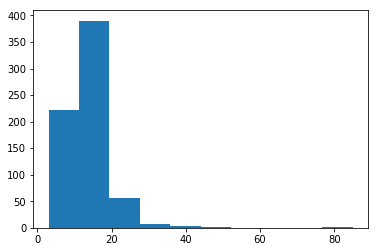

In [42]:
import matplotlib.pyplot as plt
plt.hist(data['P(IPO)'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c9ffc0c18>,
      dtype=object)

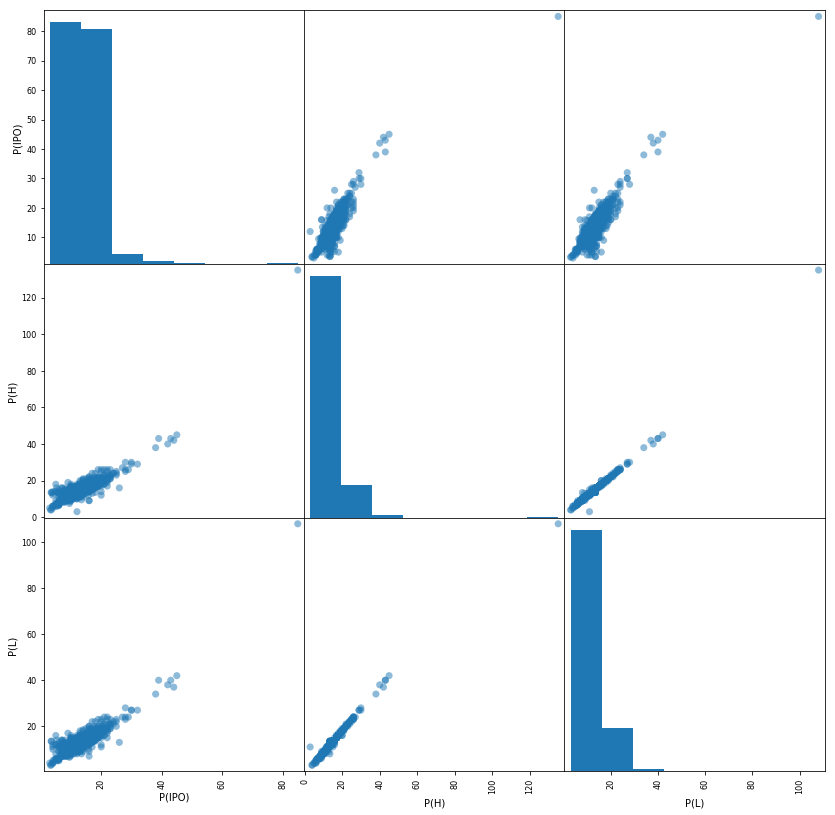

In [43]:
pd.plotting.scatter_matrix(data[["P(IPO)","P(H)","P(L)"]], figsize=(14,14), hist_kwds={'bins':8}, alpha=.5, marker='o', s=50)

In [24]:
no_object = data.select_dtypes(exclude=['object'])

In [25]:
no_object.values

array([[10.        ,  9.5       ,  8.5       , ...,  3.86434453,
        19.        , 19.        ],
       [ 8.        , 10.        ,  8.        , ..., 12.02883167,
         7.        ,  7.        ],
       [ 7.        , 14.        , 12.        , ...,  3.3691336 ,
         6.        ,  6.        ],
       ...,
       [ 8.        ,  8.5       ,  7.5       , ...,  3.67354432,
        15.        , 15.        ],
       [19.        , 17.        , 15.        , ...,  4.21768352,
        18.        , 18.        ],
       [16.        , 16.        , 14.        , ...,  3.24050714,
        15.        , 15.        ]])

In [26]:
# normalize with min/max
x = no_object.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

NameError: name 'preprocessing' is not defined

In [ ]:
# normalization with sklearn 
from sklearn import preprocessing
# Normalize P(IPO) column (1 column)
x_array = np.array(data['P(IPO)'])
normalized_X = preprocessing.normalize([x_array])

In [ ]:
normalized_X

In [ ]:
# mean normalization
normalized_df=(df-df.mean())/df.std()

# min/max normalization 
normalized_df=(df-df.min())/(df.max()-df.min())

# Note that `select_dtypes` returns a data frame. We are selecting only the columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(zscore)

# Standardization/normalization 

In [ ]:
# STANDARDIZATION
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [ ]:
# Correlation Analysis 

In [ ]:
# WHEN YOU HAVE ALL THE CALCULATIONS AND VARIATIONS DOWN DECIDE ON THE ORDER OF THE PROCESSING AND WHAT TO TRY AFTER
# THEN RUN THE MODEL